<a href="https://colab.research.google.com/github/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import plotly.express as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [3]:
pip install haversine

In [4]:
from haversine import haversine

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/NYC Taxi Data.csv',parse_dates=['pickup_datetime','dropoff_datetime'],)

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df[df['store_and_fwd_flag']=='Y'].shape #check with location 

(8045, 11)

# Checking time_durating with the time stamps from pickup_datetime &   dropoff_datetime.

In [ ]:
#Creating total_ride_duration check and compering with trip duraiton. 

df['total_ride_duration_check'] = df.dropoff_datetime - df.pickup_datetime

#Checking for Error 


In [ ]:
#Converting date time into seconds 

df['total_ride_duration_check']=df['total_ride_duration_check'].dt.total_seconds()

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_ride_duration_check
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,435.0


In [ ]:
#Converting trip_duration into float type 


df['trip_duration'] = df['trip_duration'].astype(float)

In [ ]:
#Comparing sum of both columns, if true there is no Irregularity. 


df['trip_duration'].sum() == df['total_ride_duration_check'].sum()

True

Maximum & Minimum drop latitude

In [ ]:
# Maximum drop latitude
print('Maximum drop latitude   :'  , min(df['dropoff_latitude'].min(),df['pickup_latitude'].min()    ))

# Minimum drop latitude
print('Minimum drop latitude   :'  , max(df['pickup_latitude'].max(),df['dropoff_latitude'].max()    ))


Maximum drop latitude   : 32.1811408996582
Minimum drop latitude   : 51.88108444213867


Maximum & Minimum Pickup latitude

In [ ]:
#Maximum drop longitude

print('Maximum drop longitude  :'  , max(df['pickup_longitude'].max(),df['dropoff_longitude'].max()  ))


#Minimum drop longitude

print('Minimum drop longitude  :'  , min(df['dropoff_longitude'].min() ,df['pickup_longitude'].min() )) 



Maximum drop longitude  : -61.33552932739258
Minimum drop longitude  : -121.93334197998048


# Plotting ditribution plot to check for skewed values 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transformed - Trip Duration')

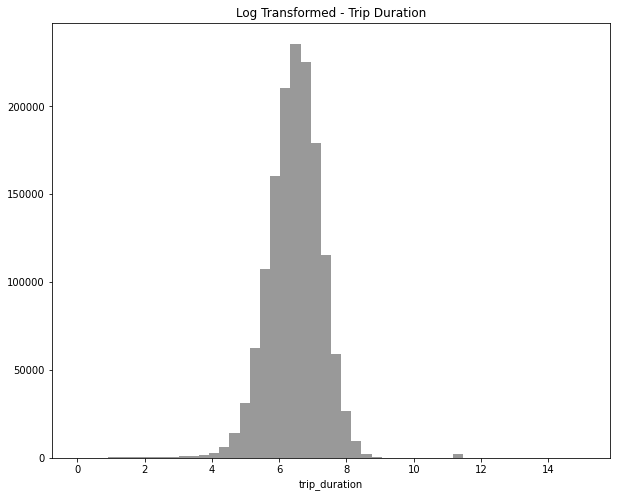

In [ ]:
#Performing log transformation to correct skewed values 

plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

In [ ]:
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_ride_duration_check
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778.0,778.0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655.0,655.0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764.0,764.0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373.0,373.0


In [ ]:
#checking passenger count 
df[df['passenger_count']==7]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,total_ride_duration_check
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,N,19.0,19.0
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:23,7,-74.039482,40.715031,-74.039482,40.715019,N,15.0,15.0
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:33,7,-73.631149,40.768551,-73.631149,40.768551,N,25.0,25.0


#date time 

In [ ]:
from datetime import datetime
from datetime import date

#Day


df['pickup_datetime_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_datetime_day']=df['dropoff_datetime'].dt.day_name()

#Month

df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month



# Time

df['Pick-Up time'] = df['pickup_datetime'].dt.time
df['Drop-off time'] = df['dropoff_datetime'].dt.time

#Year

df['pickup_Year']=df['pickup_datetime'].dt.year
df['dropoff_Year']=df['dropoff_datetime'].dt.year





# Plotting Pickup locations and Drop location on a Map

In [8]:
pip install datashader 

     |████████████████████████████████| 18.2 MB 63.5 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 136 kB 51.1 MB/s 
     |████████████████████████████████| 837 kB 32.9 MB/s 
     |████████████████████████████████| 830 kB 50.1 MB/s 
     |████████████████████████████████| 822 kB 38.7 MB/s 
     |████████████████████████████████| 802 kB 51.6 MB/s 
     |████████████████████████████████| 802 kB 42.4 MB/s 
     |████████████████████████████████| 793 kB 45.4 MB/s 
     |████████████████████████████████| 793 kB 44.1 MB/s 
     |████████████████████████████████| 791 kB 37.4 MB/s 
     |████████████████████████████████| 786 kB 36.9 MB/s 
     |████████████████████████████████| 779 kB 43.7 MB/s 
     |████████████████████████████████| 778 kB 43.0 MB/s 
     |████████████████████████████████| 776 kB 48.0 MB/s 
     |████████████████████████████████| 769 kB 51.7 MB/s 
     |████████████████████████████████| 766 kB 52.3 MB/s 
     |█████████

In [9]:


import datashader as ds

import datashader.transfer_functions as tf

from colorcet import fire, kbc,bmw,gray

# Build an abstract canvas representing the space in which to plot data
cvs = ds.Canvas(plot_width=15000, plot_height=15000)

# project the longitude and latitude onto the canvas and
# map the data to pixels as points
aggs = cvs.points(df, x='pickup_longitude', y='pickup_latitude')

# aggs is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = aggs.coords['pickup_latitude'].values, aggs.coords['pickup_longitude'].values

# Set the corners of the image that need to be passed to the mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]


# Set the image color, and the legend (how) types
# linear (how=linear), logarithmic (how=log), percentile (how=eq_hist)
img = tf.shade(aggs, cmap= kbc, how='log', alpha=255)[::-1].to_pil()

# Create a quick mapbox figure with plotly
fig = px.scatter_mapbox(df[:1], lat='pickup_latitude', lon='pickup_longitude', zoom=10)

# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_layers=[
                      {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                      }
                  ]
)
fig.show()

In [10]:
import datashader as ds

import datashader.transfer_functions as tf

from colorcet import fire, kbc,bmw,gray

# Build an abstract canvas representing the space in which to plot data
cvs = ds.Canvas(plot_width=15000, plot_height=15000)

# project the longitude and latitude onto the canvas and
# map the data to pixels as points
aggs = cvs.points(df, x='dropoff_longitude', y='dropoff_latitude')

# aggs is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = aggs.coords['dropoff_latitude'].values, aggs.coords['dropoff_longitude'].values

# Set the corners of the image that need to be passed to the mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]


# Set the image color, and the legend (how) types
# linear (how=linear), logarithmic (how=log), percentile (how=eq_hist)
img = tf.shade(aggs, cmap= fire, how='log', alpha=255)[::-1].to_pil()

# Create a quick mapbox figure with plotly
fig = px.scatter_mapbox(df[:1], lat='dropoff_latitude', lon='dropoff_longitude', zoom=10)

# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_layers=[
                      {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                      }
                  ]
)
fig.show()

# Outliers

In [11]:
def plot_hires(df, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

 
    ax.scatter(df.pickup_longitude, df.pickup_latitude, c=c[0], s=5, alpha=0.1)
  #ax.scatter(df.dropoff_longitude,df.dropoff_latitude, c=c[1], s=0.01, alpha=0.5)



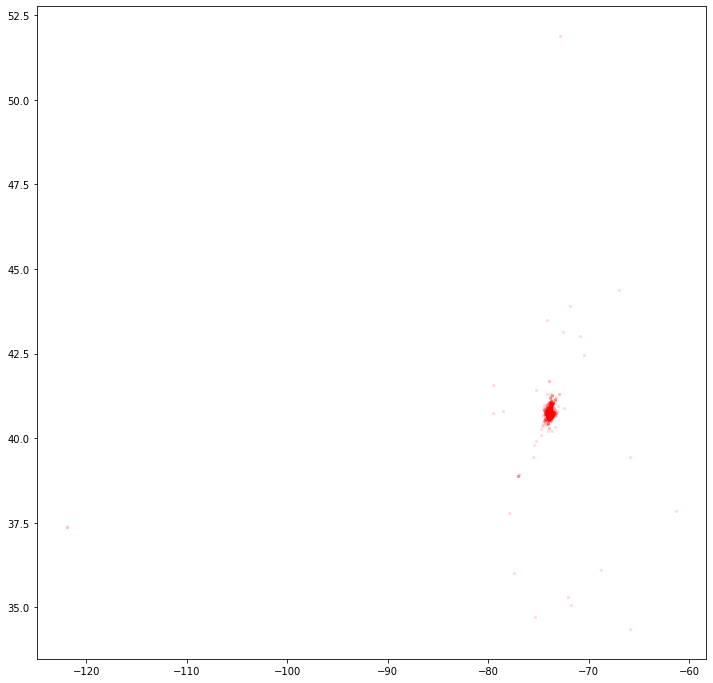

In [12]:
plot_hires(df)


In [13]:
def plot_hires(df, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

 
    ax.scatter(df.dropoff_longitude,df.dropoff_latitude, c=c[1], s=5, alpha=0.5)
  



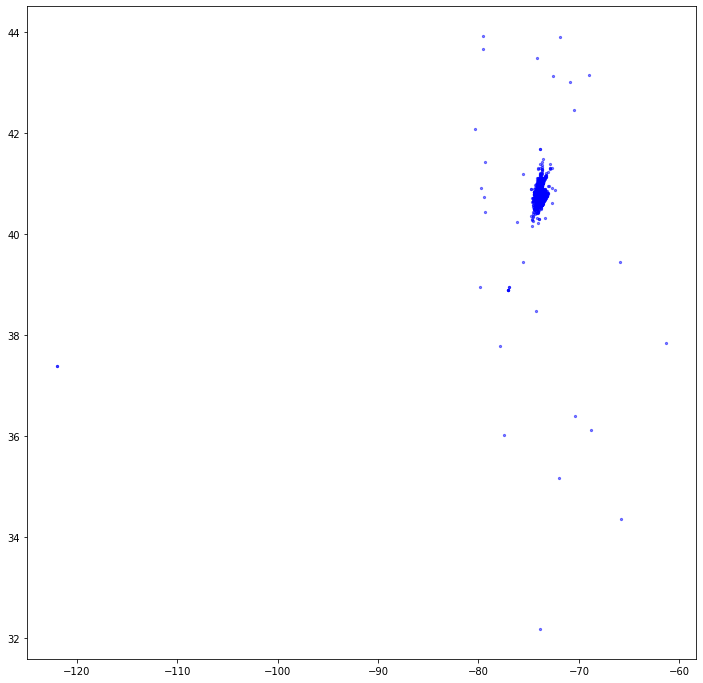

In [14]:
plot_hires(df)


#Distance

Distance 


In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
df['distance'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
df['distance_miles'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
df["distance_miles"] = distance(df["pickup_latitude"], df["pickup_longitude"], 
                                      df["dropoff_latitude"], df["dropoff_longitude"])

# Average Speed

In [ ]:
df['trip_duration'] = df['trip_duration'].astype(float)

In [ ]:
df['average_speed'] = df['distance_miles']/(df['trip_duration']/3600)

In [ ]:
df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

In [ ]:
df.sort_values(by="distance_miles", ascending=False )

# Data Cleaning 

Checking for values which have distance greater than time 

In [ ]:
df[df['trip_duration']<=df['distance_miles']]

Time

In [ ]:
import plotly.express as px

fig = px.box(df, y='trip_duration')
fig.show()

In [ ]:
df.shape

In [ ]:
df=df[(df['trip_duration']>1) & (df['trip_duration']<10800)]

In [ ]:
df.shape

In [ ]:
1458644-1456481

Distance

In [ ]:


fig = px.box(df, y='distance_miles')
fig.show()

In [ ]:
df[(df['distance_miles']>0.6) & (df['distance_miles']<5)]

In [ ]:
df.shape

In [ ]:
a=df[(df['distance_miles']>0) & (df['distance_miles']<0.6)]

In [ ]:
a.shape

In [ ]:
a['trip_duration'].describe()

In [ ]:
fig = px.box(a, y='trip_duration')
fig.show()

In [ ]:
b=df[(df['trip_duration']> 177) & (df['trip_duration']< 383)]

In [ ]:
b.shape

In [ ]:
272952-272952